In [1]:
from scipy.ndimage import imread
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, '/Users/choldgraf/github/mne-python/')
import mne
from mne.viz.utils import ClickableImage
from mne.channels.layout import generate_2d_layout

In [2]:
im = imread('/Users/choldgraf/github/mne-python/mne/data/image/mni_brain.png')

In [10]:
# Make sure that inline plotting is off before clicking
%matplotlib qt
click = ClickableImage(im)

##Show results

In [11]:
%matplotlib inline

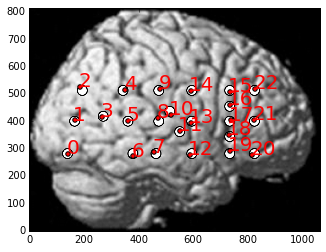

[(141.31451612903228, 280.5), (169.1491935483871, 403.75), (186.27822580645162, 524.875), (267.64112903225805, 416.5), (351.14516129032256, 516.375), (359.70967741935488, 401.625), (378.97983870967744, 272.0), (458.20161290322585, 286.875), (471.04838709677426, 412.25), (477.47177419354841, 518.5), (520.29435483870975, 425.0), (552.41129032258073, 365.5), (588.8104838709678, 278.375), (590.95161290322585, 395.25), (593.0927419354839, 512.125), (734.40725806451621, 507.875), (734.40725806451621, 459.0), (736.54838709677426, 403.75), (732.26612903225805, 350.625), (734.40725806451621, 291.125), (813.62903225806451, 278.375), (822.19354838709683, 405.875), (824.33467741935488, 518.5)]


In [12]:
# The click coordinates are stored as a list of tuples
click.plot_clicks()
print click.coords

In [13]:
# Create some fake data
nchans = len(click.coords)
nepochs = 50
sr = 1000
nsec = 5
events = np.arange(nepochs).reshape([-1, 1])
events = np.hstack([events, np.zeros([nepochs, 2])])
data = np.random.randn(nepochs, nchans, sr * nsec)
info = mne.create_info(list(np.arange(nchans).astype(str)), sr, ch_types='eeg')
epochs = mne.EpochsArray(data, info, events)

In [14]:
# Generate a layout from our clicks and normalize by the image
lt = generate_2d_layout(np.vstack(click.coords), bg_image=im) 

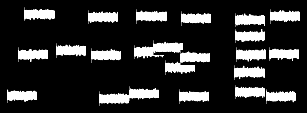

In [15]:
# Using the native plot_topo function
f = mne.viz.plot_topo(epochs.average(), layout=lt)

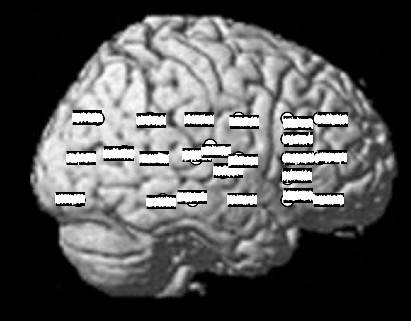

In [16]:
# Now with the image plotted in the background
f = mne.viz.plot_topo(epochs.average(), layout=lt)
ax = f.add_axes([0, 0, 1, 1])
ax.imshow(im)
ax.set_zorder(-1)